# TODO
- #TODO: Clean validation data
- #TODO: 192x192
- #TODO: NO VALIDALTION ON augm
- #TODO: 16 epoch nur Center + flip, dann mit R/L und ausblendfenster geradeaus
- TOOD: PUT EMPHASIS VON SHARP CORNERS!!

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import self_driving_car
from self_driving_car import data_generator
from self_driving_car import model
from imp import reload
%matplotlib inline
reload(self_driving_car)
reload(self_driving_car.data_generator)
reload(self_driving_car.model)
print('reloaded')
MODEL = "simple3"

reloaded


Using TensorFlow backend.


# Training Episode 1 (beta sim, center only)

split data into 6031 training sample and 1508 validation samples
Number of samples:            37695
Number of active sample:      4524
Number of training samples:   4022
Number of validation samples: 502


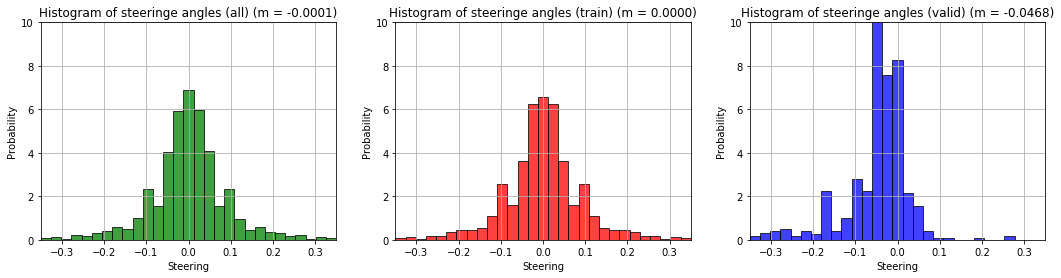

loading images to ram...
all images loaded to ram


In [2]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
# NO SHUFFLING!
datagen.split(valid_size=0.2)
datagen.activate_mod('mod_flip')
datagen.deactivate_cam('L')
datagen.deactivate_cam('R')
datagen.plot_stats()
datagen.load_img_to_ram()

Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/14
3968/4022 [============================>.] - ETA: 0s - loss: 0.1531 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to /mnt/models//simple3/weights/20170213_A/weights.00-0.0105.hdf5
4096/4022 [==============================] - 17s - loss: 0.1484 - val_loss: 0.0105
Epoch 2/14
4096/4022 [==============================] - 16s - loss: 0.0066 - val_loss: 0.0100
Epoch 3/14
4096/4022 [==============================] - 16s - loss: 0.0052 - val_loss: 0.0070
Epoch 4/14
4096/4022 [==============================] - 17s - loss: 0.0040 - val_loss: 0.0065
Epoch 5/14
4096/4022 [==============================] - 16s - loss: 0.0034 - val_loss: 0.0061
Epoch 6/14
4096/4022 [==============================] - 16s - loss: 0.0031 - val_loss: 0.0063
Epoch 7/14
4096/4022 [==============================] - 16s - loss: 0.0026 - val_loss: 0.0062
Epoch 8/14
4096/4022 [==============================] - 16s - loss: 0.0024 - val_loss: 0.0066
Epoch 9/14
4096/4022 [==============================] - 17s - loss: 0.0022 - val_loss: 0.0062
Epoch 10/14
4096/4022 [==============================] - 17s - loss: 0.00

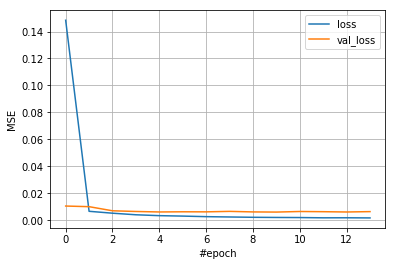

In [3]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.train_generator(datagen, "20170213_A", nb_epoch = 14)
model.plot_history();

# Training Episode 2 (beta sim, cam L/R)

shuffled data
split data into 9774 training sample and 2448 validation samples
17513 samples randomly removed due to steering < 0.080000
steering angle corrected by +/- 0.180000
Number of samples:            43597
Number of active sample:      15684
Number of training samples:   13898
Number of validation samples: 1786


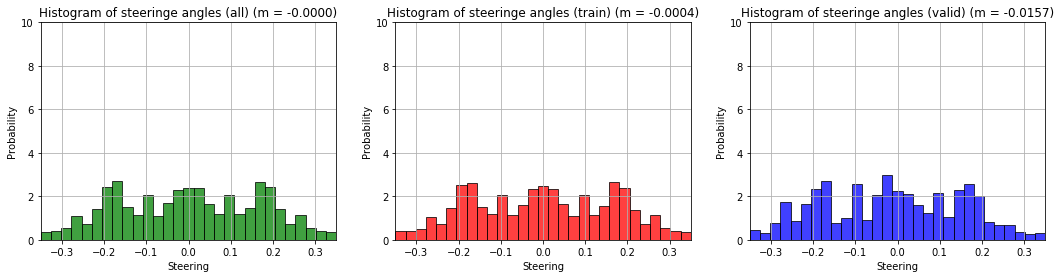

loading images to ram...
all images loaded to ram


In [4]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.add_dataset("dataset5_beta_backwards")
datagen.shuffle()
datagen.split(valid_size=0.2)    
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.40)
datagen.correct_camera_steering(0.18) # 0.15 nicht gut!!
datagen.plot_stats()
datagen.load_img_to_ram()

Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/6
13824/13898 [============================>.] - ETA: 0s - loss: 0.0225 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to /mnt/models//simple3/weights/20170213_B/weights.00-0.0137.hdf5
13952/13898 [==============================] - 74s - loss: 0.0224 - val_loss: 0.0137
Epoch 2/6
13952/13898 [==============================] - 73s - loss: 0.0145 - val_loss: 0.0125
Epoch 3/6
13952/13898 [==============================] - 73s - loss: 0.0106 - val_loss: 0.0082
Epoch 4/6
13952/13898 [==============================] - 73s - loss: 0.0077 - val_loss: 0.0060
Epoch 5/6
13952/13898 [==============================] - 72s - loss: 0.0060 - val_loss: 0.0051
Epoch 6/6
13952/13898 [==============================] - 72s - loss: 0.0051 - val_loss: 0.0043


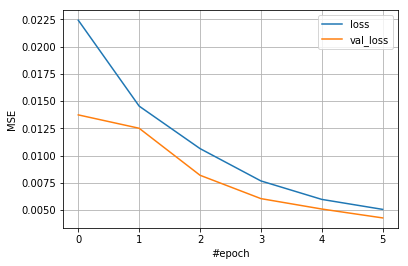

In [6]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170213_A", 13)
model.train_generator(datagen, "20170213_B", nb_epoch = 6) # lr=0.01
model.plot_history();

# Training Episode 5: all-in

shuffled data
split data into 9135 training sample and 2277 validation samples
steering angle corrected by +/- 0.180000
Number of samples:            57060
Number of active sample:      20480
Number of training samples:   18203
Number of validation samples: 2277


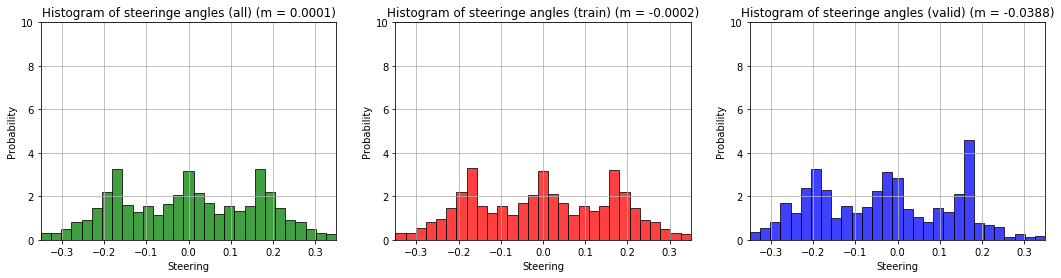

loading images to ram...
all images loaded to ram


In [7]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.add_dataset("dataset6_curve2A")
datagen.add_dataset("dataset7_curve2B")
datagen.shuffle()
datagen.split(valid_size=0.2) 
datagen.activate_mod('mod_flip')
#datagen.activate_mod('mod_lighting')
#datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.50)
#datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.40)
datagen.correct_camera_steering(0.18)
datagen.plot_stats()
datagen.load_img_to_ram()

Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/8
18176/18203 [============================>.] - ETA: 0s - loss: 0.0074  

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to /mnt/models//simple3/weights/20170213_C/weights.00-0.0059.hdf5
18304/18203 [==============================] - 113s - loss: 0.0073 - val_loss: 0.0059
Epoch 2/8
18304/18203 [==============================] - 112s - loss: 0.0055 - val_loss: 0.0044
Epoch 3/8
18304/18203 [==============================] - 112s - loss: 0.0046 - val_loss: 0.0036
Epoch 4/8
18304/18203 [==============================] - 112s - loss: 0.0042 - val_loss: 0.0041
Epoch 5/8
18304/18203 [==============================] - 112s - loss: 0.0038 - val_loss: 0.0038
Epoch 6/8
18304/18203 [==============================] - 112s - loss: 0.0035 - val_loss: 0.0038
Epoch 7/8
18304/18203 [==============================] - 112s - loss: 0.0033 - val_loss: 0.0033
Epoch 8/8
18304/18203 [==============================] - 112s - loss: 0.0031 - val_loss: 0.0030


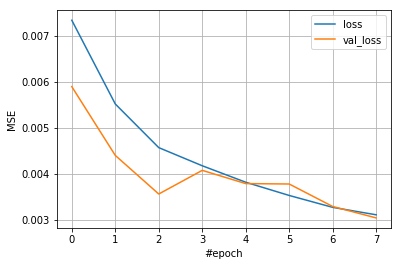

In [9]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170213_B", 5)
model.train_generator(datagen, "20170213_C", nb_epoch = 8)
model.plot_history();

Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/8
18176/18203 [============================>.] - ETA: 0s - loss: 0.0033  

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to /mnt/models//simple3/weights/20170213_D/weights.00-0.0033.hdf5
18304/18203 [==============================] - 110s - loss: 0.0033 - val_loss: 0.0033
Epoch 2/8
18304/18203 [==============================] - 108s - loss: 0.0031 - val_loss: 0.0031
Epoch 3/8
18304/18203 [==============================] - 109s - loss: 0.0030 - val_loss: 0.0031
Epoch 4/8
18304/18203 [==============================] - 109s - loss: 0.0028 - val_loss: 0.0031
Epoch 5/8
18304/18203 [==============================] - 108s - loss: 0.0027 - val_loss: 0.0029
Epoch 6/8
18304/18203 [==============================] - 107s - loss: 0.0025 - val_loss: 0.0029
Epoch 7/8
18304/18203 [==============================] - 105s - loss: 0.0024 - val_loss: 0.0030
Epoch 8/8
18304/18203 [==============================] - 103s - loss: 0.0024 - val_loss: 0.0032


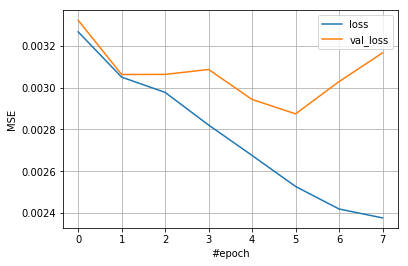

In [10]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170213_C", 7)
model.train_generator(datagen, "20170213_D", nb_epoch = 8)
model.plot_history();

shuffled data
split data into 9111 training sample and 2301 validation samples
18671 samples randomly removed due to steering < 0.050000
steering angle corrected by +/- 0.180000
Number of samples:            38389
Number of active sample:      13874
Number of training samples:   12332
Number of validation samples: 1542


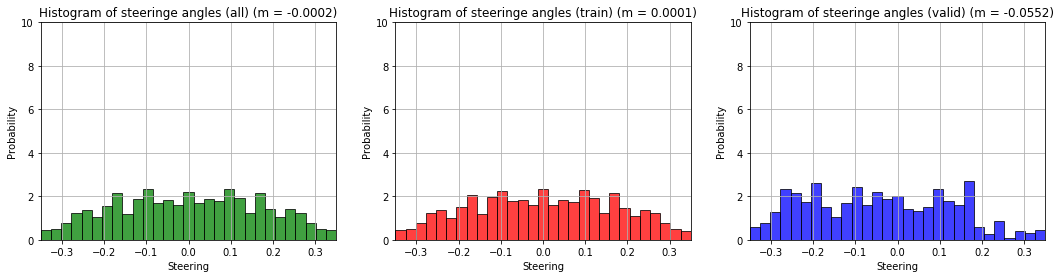

loading images to ram...
all images loaded to ram


In [11]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.add_dataset("dataset6_curve2A")
datagen.add_dataset("dataset7_curve2B")
datagen.shuffle()
datagen.split(valid_size=0.2) 
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.05, low_steering_remove_prop = 0.60)
datagen.correct_camera_steering(0.18)
datagen.plot_stats()
datagen.load_img_to_ram()

# FAVORIT: 20170213_C, Epoch 2

Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/8
12288/12332 [============================>.] - ETA: 0s - loss: 0.0055 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to /mnt/models//simple3/weights/20170213_D2/weights.00-0.0042.hdf5
12416/12332 [==============================] - 60s - loss: 0.0055 - val_loss: 0.0042
Epoch 2/8
12416/12332 [==============================] - 59s - loss: 0.0049 - val_loss: 0.0037
Epoch 3/8
12416/12332 [==============================] - 59s - loss: 0.0045 - val_loss: 0.0044
Epoch 4/8
12416/12332 [==============================] - 60s - loss: 0.0042 - val_loss: 0.0037
Epoch 5/8
12416/12332 [==============================] - 61s - loss: 0.0038 - val_loss: 0.0035
Epoch 6/8
12416/12332 [==============================] - 61s - loss: 0.0037 - val_loss: 0.0039
Epoch 7/8
12416/12332 [==============================] - 60s - loss: 0.0034 - val_loss: 0.0034
Epoch 8/8
12416/12332 [==============================] - 60s - loss: 0.0033 - val_loss: 0.0043


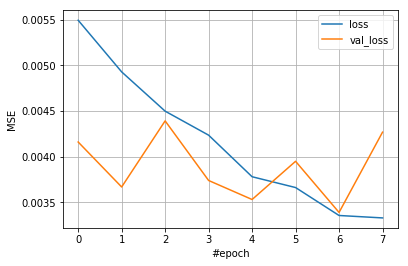

In [12]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170213_C", 2)
model.train_generator(datagen, "20170213_D2", nb_epoch = 8)
model.plot_history();

shuffled data
split data into 7982 training sample and 3430 validation samples
38852 samples randomly removed due to steering < 0.100000
steering angle corrected by +/- 0.180000
5314 samples randomly removed due to steering < 0.100000
Number of samples:            12894
Number of active sample:      4387
Number of training samples:   3591
Number of validation samples: 796


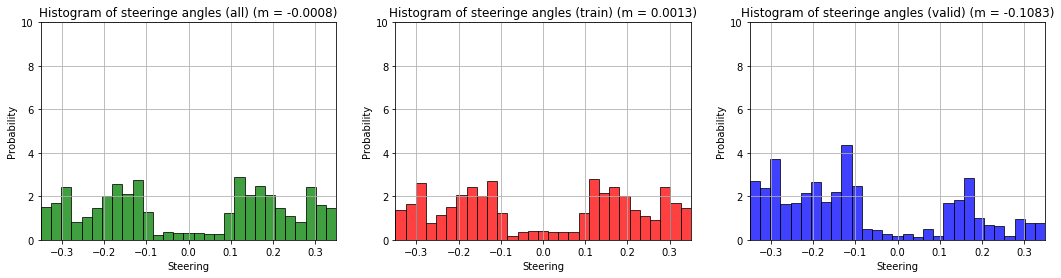

loading images to ram...
all images loaded to ram


In [15]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.add_dataset("dataset6_curve2A")
datagen.add_dataset("dataset7_curve2B")
datagen.shuffle()
datagen.split(valid_size=0.3) 
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.90)
datagen.correct_camera_steering(0.18)
datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.90)
datagen.plot_stats()
datagen.load_img_to_ram()

setting learning rate to 0.000500
Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/5
3584/3591 [============================>.] - ETA: 0s - loss: 0.0048 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to /mnt/models//simple3/weights/20170213_E1/weights.00-0.0027.hdf5
3712/3591 [===============================] - 13s - loss: 0.0047 - val_loss: 0.0027
Epoch 2/5
3712/3591 [===============================] - 12s - loss: 0.0042 - val_loss: 0.0027
Epoch 3/5
3712/3591 [===============================] - 12s - loss: 0.0037 - val_loss: 0.0027
Epoch 4/5
3712/3591 [===============================] - 12s - loss: 0.0035 - val_loss: 0.0027
Epoch 5/5
3712/3591 [===============================] - 13s - loss: 0.0032 - val_loss: 0.0028


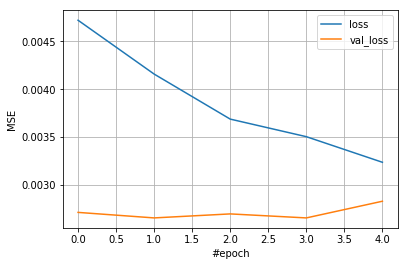

In [17]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170213_D2", 6)
model.train_generator(datagen, "20170213_E1", nb_epoch = 5, lr=0.0005)
model.plot_history();

In [ ]:
1/0

# Training Episode 3 *alternativ* (backward data + beta) --> ÜBERSPRUNGEN

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.add_dataset("dataset5_beta_backwards")
datagen.shuffle()
datagen.split(valid_size=0.2)    
datagen.activate_mod('mod_flip')
#datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.20)
datagen.correct_camera_steering(0.18)
datagen.plot_stats()
datagen.load_img_to_ram()

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170212_B", 5)
model.train_generator(datagen, "20170212_C", nb_epoch = 10) # lr=0.01
model.plot_history();

# Training Episode 4: refinement

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.add_dataset("dataset6_curve2A")
datagen.add_dataset("dataset7_curve2B")
datagen.shuffle()
datagen.split(valid_size=0.2) 
datagen.activate_mod('mod_flip')
#datagen.activate_mod('mod_lighting')
#datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.50)
datagen.correct_camera_steering(0.18)
datagen.plot_stats()
datagen.load_img_to_ram()

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170212_B", 5)
model.train_generator(datagen, "20170212_D", nb_epoch = 12)
model.plot_history();

In [ ]:
1/0

# Training Episode 3 (udacity data) --> AB HIER WIRD ES SCHLIMMER

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset1_udacity")
datagen.shuffle()
datagen.split(valid_size=0.2)    
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.01, low_steering_remove_prop = 0.90)
datagen.correct_camera_steering(0.18) # 0.15 nicht gut!!
datagen.plot_stats()
datagen.load_img_to_ram()

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170212_B", 5)
model.train_generator(datagen, "20170212_C", nb_epoch = 6) # lr=0.01
model.plot_history();

# ALT:

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.shuffle() # KEIN SHUFFLE?!?
datagen.split(valid_size=0.2)
#datagen.deactivate_cam('L')
#datagen.deactivate_cam('R')
datagen.deactivate_mod('mod_blur')
datagen.deactivate_mod('mod_shadow')
#datagen.deactivate_mod('mod_flip')
datagen.deactivate_mod('mod_lighting')
if True:
#    datagen.filter_data_low_steering(low_steering_threshold = 0.05, low_steering_remove_prop = 0.75)
#    datagen.filter_data_low_steering(low_steering_threshold = 0.05, low_steering_remove_prop = 0.50)   
    datagen.correct_camera_steering(0.18) # 0.15 nicht gut!!

In [ ]:
model.load_weights(session_name, epoch)
model.train_generator(datagen, "20170211_F3", nb_epoch = 4, lr = 0.008)
model.plot_history();

In [ ]:
import pydot_ng
from keras.utils.visualize_util import plot
model.model.summary()
plot(model.model, to_file=('doc/images/model_%s.png' % model.modelname))

# Model: Udacity
![model_udacity](./doc/images/model_udacity.png)

In [ ]:
datagen.normalizer = model.normalizer
vdata = datagen.get_valid_data()
print(vdata[0].shape)
s_pred = model.model.predict(vdata[0], batch_size=128)
print(s_pred.shape)

plt.figure(figsize=(18,4))
plt.plot(s_pred[:500:2]) # blau
plt.plot(vdata[1][:500:2]) # orange
plt.show()

In [ ]:
plt.figure(figsize=(18,18))
for i in range(6*6):
    idx = np.random.randint(vdata[0].shape[0]);
    img = vdata[0][idx,:,:,:];
    plt.subplot(6,6,i+1)
    plt.text(10,25,'s:%.2f (%.2f)' % (s_pred[idx], vdata[1][idx]), color='w', fontsize=13, backgroundcolor='k')
    plt.imshow(img)
plt.show()

In [ ]:
gen = datagen.get_batch_generator()
tdata = next(gen)
s2_pred = model.model.predict(tdata[0], batch_size=192)
plt.figure()
plt.plot(s2_pred[::2]) # blau
plt.plot(tdata[1][::2]) # orange
plt.show()

In [ ]:
plt.figure(figsize=(18,18))
for i in range(6*6):
    idx = i;
    img = tdata[0][idx,:,:,:];
    plt.subplot(6,6,i+1)
    plt.text(10,25,'s:%.2f (%.2f)' % (s2_pred[idx], tdata[1][idx]), color='w', fontsize=13, backgroundcolor='k')
    plt.imshow(img)
plt.show()

In [ ]:
datagen.data[np.logical_and(datagen.data.is_train, datagen.data.is_active)]

In [ ]:
datagen.data[np.logical_and(datagen.data.is_valid, datagen.data.is_active)]

In [ ]:
#datagen.add_dataset("dataset1_udacity")
#datagen.add_dataset("dataset2_twe_one_lap")
#datagen.add_dataset("dataset3_ssz_one_lap")
##datagen.auto_prepare();
#datagen.smooth_steering(window=60); # <<<<<<<< das ist gut -- ne
# DAS WAR GUT:
#datagen.filter_data_not_moving()
#datagen.filter_data_low_steering(low_steering_threshold = 0.05, low_steering_remove_prop = 0.75)
#datagen.correct_camera_steering(0.03)
##datagen.filter_data_low_steering(low_steering_threshold = 0.04, low_steering_remove_prop = 0.4+0.1)
##datagen.filter_data_low_steering(low_steering_threshold = 0.03, low_steering_remove_prop = 0.5+0.1)
#datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.3)
#datagen.filter_data_low_steering(low_steering_threshold = 0.02, low_steering_remove_prop = 0.6+0.1) #raus?
#datagen.correct_camera_steering(0.05)
#datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.30) # NEW?
#datagen.filter_data_low_steering(low_steering_threshold = 0.02, low_steering_remove_prop = 0.85) # <
#datagen.filter_data_low_steering(low_steering_threshold = 0.03, low_steering_remove_prop = 0.85) # NEU (x2)
#datagen.correct_camera_steering(0.08)
#datagen.correct_camera_steering(0.18)
#datagen.activate_mod('mod_blur')
#datagen.activate_mod('mod_shadow') # UMSTELLEN AUF activate
#datagen.activate_mod('mod_lighting')